In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [25]:
import pandas as pd
import numpy as np
origin = pd.read_csv('/content/drive/MyDrive/Machine Learning/Bike Buyers/bike_buyers.csv')
df = origin.copy

#Categorical
replacement_dict = {'Marital Status': 'Unknown', 
                    'Gender': 'Unknown',
                    'Home Owner':'Unknown'
                    }
df.fillna(value=replacement_dict, inplace=True)

# Numerics
na_professional_median = df[(df['Region']=='North America')&(df['Occupation']=='Professional')]['Income'].median()
df.iloc[509,df.columns.get_loc('Income')] = na_professional_median

eu_manual_median = df[(df['Region']=='Europe')&(df['Occupation']=='Manual')]['Income'].median()
for i in [9,110,191]:
  df.iloc[i,df.columns.get_loc('Income')] = eu_manual_median

pacific_clerical_median = df[(df['Region']=='Europe')&(df['Occupation']=='Clerical')]['Income'].median()
df.iloc[301,df.columns.get_loc('Income')] = pacific_clerical_median

pacific_SkilledManual_median = df[(df['Region']=='Europe')&(df['Occupation']=='Skilled Manual')]['Income'].median()
df.iloc[441,df.columns.get_loc('Income')] = pacific_SkilledManual_median

df.iloc[638,df.columns.get_loc('Children')] = int(df[(df.Age>=70)&(pd.isnull(df.Children)==False)].Children.median())

for i in [117,217]:
  df.iloc[i,df.columns.get_loc('Children')] = df[(df['Region']=='Europe')].Children.median()

for i in [386,549,688,805,960]:
  df.iloc[i,df.columns.get_loc('Children')] = 0

for i in [202,448]:
  df.iloc[i,df.columns.get_loc('Cars')] = df[(df.Occupation=='Clerical')&(pd.isnull(df.Cars)==False)&(df.Region=='Europe')].Cars.median()

df.iloc[561,df.columns.get_loc('Cars')] = df[(df.Occupation=='Clerical')&(pd.isnull(df.Cars)==False)&(df.Region=='North America')].Cars.median()



In [91]:
df.isnull().sum()

ID                  0
Marital Status      0
Gender              0
Income              0
Children            0
Education           0
Occupation          0
Home Owner          0
Cars                9
Commute Distance    0
Region              0
Age                 8
Purchased Bike      0
dtype: int64

In [112]:
df[(pd.isnull(df.Cars))].sort_values(by='Occupation')

,ID,Marital Status,Gender,Income,Children,Education,Occupation,Home Owner,Cars,Commute Distance,Region,Age,Purchased Bike
511,12207,Single,Male,80000.0,4.0,Bachelors,Management,Yes,NaN,5-10 Miles,North America,66.0,Yes
351,13572,Single,Male,10000.0,3.0,High School,Manual,Yes,NaN,0-1 Miles,Europe,37.0,Yes
12,11434,Married,Male,170000.0,5.0,Partial College,Professional,Yes,NaN,0-1 Miles,Europe,55.0,No
196,16209,Single,Female,50000.0,0.0,Graduate Degree,Skilled Manual,Yes,NaN,1-2 Miles,Europe,36.0,No
615,11538,Single,Female,60000.0,4.0,Graduate Degree,Skilled Manual,No,NaN,0-1 Miles,North America,47.0,Yes
933,11941,Single,Male,60000.0,0.0,Partial College,Skilled Manual,Yes,NaN,5-10 Miles,North America,29.0,No


In [111]:
df.iloc[561,df.columns.get_loc('Cars')] = df[(df.Occupation=='Clerical')&(pd.isnull(df.Cars)==False)&(df.Region=='North America')].Cars.median()

In [108]:
df[(df.Occupation=='Clerical')&(pd.isnull(df.Cars)==False)&(df.Region=='Europe')[]

SyntaxError: ignored

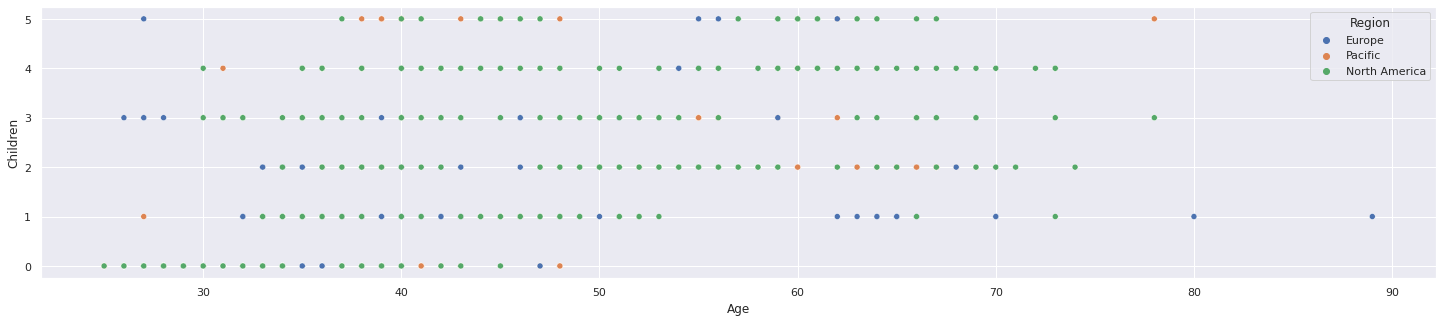

In [86]:
import seaborn as sns

sns.scatterplot(data=df,x='Age',y='Children',hue='Region')

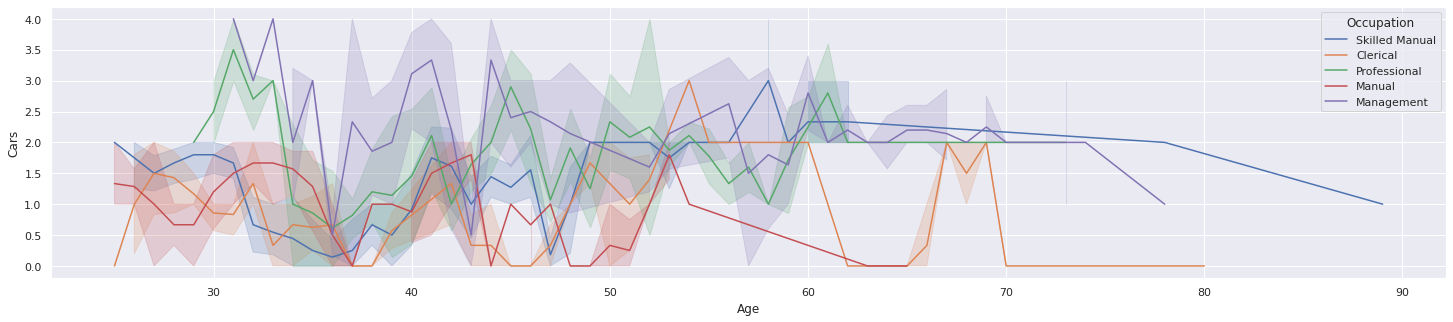

In [96]:
import seaborn as sns

sns.lineplot(data=df,x='Age',y='Cars',hue='Occupation')